In [1]:
# In Class Lab 6
# Surface Brightness Profiles : Disks


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

ModuleNotFoundError: No module named 'ReadFile'

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's Disk. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with the surface brightness profile from Lecture 12 Slide 31. 

# Part A : 

Create a function called `SurfaceBrightnessDisk` that returns the Surface Brightness Profile in terms of the disk scale length $h_r$ . 

$I(r) = I_o exp^{-r/hr)}$

Where 

$ L = \pi I_o h_r^2 (2n!)$ , where $n$ = 1. 

We will assume a mass to light ratio for the stellar disk of 1.

The function should take as input the radius, $h_r$, $n$ and the total stellar mass of the system.


In [ ]:
def SurfaceBrightnessDisk(r, hr, mtot):
    """ Function that computes the Sersic Profile for a Disk 
    System, assuming M/L ~ 1
    PARMETERS
    ---------
        r: `float`
            2D Distance from the center of the galaxy (kpc)
        hr: `float`
            Scale length of the disk (kpc)
        mtot: `float`
            the total stellar mass (Msun)

    RETURNS
    -------
        I: `array of floats`
            the surface brightness profile of the elliptical in Lsun/kpc^2

    """

    # We are assuming M/L = 1, so the total luminosity is:
    lum = mtot
    
    # the effective surface brightness is
    # L = piIohr^2(2!)
    Io = lum/np.pi/hr**2/2
    
   
    
    # The surface brightness
    I = Io*np.exp(-r/hr)
    
    return I
    
    

# Part B

Determine the Surface Mass Density Profile for the MW DISK

In [48]:
# Create a center of mass object 
# This lets us store the x, y, z, disk particles 
MW_COM = CenterOfMass("MW_000.txt", 2)
MW_COM_p = MW_COM.COM_P(0.1)
x = MW_COM.x-MW_COM_p[0].value
y = MW_COM.y-MW_COM_p[1].value
z = MW_COM.z-MW_COM_p[2].value
m = MW_COM.m

#print(x[0],y[0],z[0])

In [52]:
# Compute the surface density profile 

# calculate the radial distances in cylindrical coordinates (and theta, too)
cyl_r_mag = np.sqrt(x**2 + y**2) #np.sum(self.alg_r[:, :2]**2, axis=1))
cyl_theta = np.arctan2(y,x) # self.alg_r[:, 1], self.alg_r[:, 0])

radii = np.arange(1, 0.95 * cyl_r_mag.max(), 0.1)
       
# create the mask to select particles for each radius
# np.newaxis creates a virtual axis to make tmp_r_mag 2 dimensional
# so that all radii can be compared simultaneously
enc_mask = cyl_r_mag[:, np.newaxis] < np.asarray(radii).flatten()

# calculate the enclosed masses 
# relevant particles will be selected by enc_mask (i.e., *1)
# outer particles will be ignored (i.e., *0)
m_enc = np.sum(m[:, np.newaxis] * enc_mask, axis=0)

# use the difference between nearby elements to get mass in each annulus
m_annuli = np.diff(m_enc) # one element less then m_enc
Sigma = m_annuli / (np.pi * (radii[1:]**2 - radii[:-1]**2))

r_annuli = np.sqrt(radii[1:] * radii[:-1]) 
# here we choose the geometric mean

# Part C

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 


In [35]:
# a)  Create a mass profile object for the Milky Way 
#using solution to Homework 5
MW = MassProfile("MW",0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [36]:
# b) Array of radii 
r = np.arange(0.1,50,0.1)

c) Define a new array called `disk_mass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the disk.  Get rid of astropy units in `disk_mass` by adding `.value` 

In [37]:
# c) Use Mass Profile to return the Disk Mass Profile at each value of R
# Recall that particle type 2 = disk
disk_mass = MW.massEnclosed(2,r).value

d) Find the scale length - from the simulation rdisk = 5 kpc

In [38]:
hr =  5.0 # disk scale length in kpc

e) Disk total mass

In [41]:
# Determine the total mass of the bulge
disk_total = ComponentMass("MW_000.txt",2)*1e12
print(f"{disk_total:.2e}")


7.50e+10


# Part D

a) Plot the simulation surface mass density profile of M31's bulge as a proxy for its surface brightness profile (M/L = 1) 

b) Match the result to a Sersic Profile


NameError: name 'r_annuli' is not defined

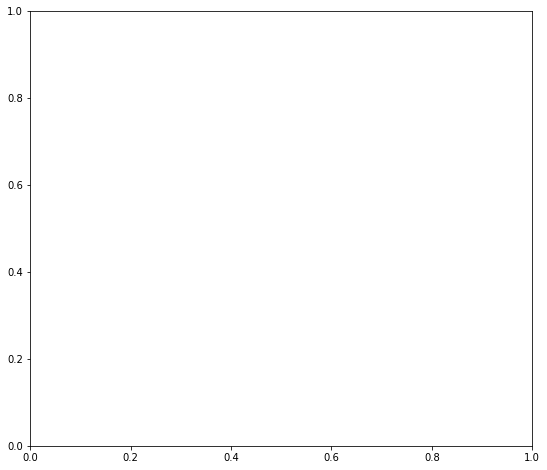

In [3]:
fig, ax = plt.subplots(figsize=(9, 8))

# Surface Density Profile
ax.loglog(r_annuli, Sigma, lw=2, alpha=0.8,label='Simulated Disk')

# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic n = 4 - de Vaucouleurs
plt.loglog(r_annuli, SurfaceBrightnessDisk(r_annuli,hr,disk_total)/1e10, color='red',
             linestyle="-.",linewidth=3, label='Surface Brightness Profile n=1')

ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\Sigma$(disk par) [$10^{10} M_\odot$ / kpc$^2$]", title="MW Disk")

#set axis limits
plt.xlim(1,50)
plt.ylim(1e-6,1)

ax.legend(loc='best')
fig.tight_layout()

#plt.savefig('Lab6.png')

In [ ]:
# Inner deviation owes to bar. 